<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Prediction-of-House-Price-Using-Linear-Regression" data-toc-modified-id="Prediction-of-House-Price-Using-Linear-Regression-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Prediction of House Price Using Linear Regression</a></span><ul class="toc-item"><li><span><a href="#Data" data-toc-modified-id="Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#1.-Explore-Data" data-toc-modified-id="1.-Explore-Data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>1. Explore Data</a></span></li><li><span><a href="#2.-Predict-Price" data-toc-modified-id="2.-Predict-Price-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>2. Predict Price</a></span><ul class="toc-item"><li><span><a href="#2.1-What-is-the-Target-Variable?-Why?" data-toc-modified-id="2.1-What-is-the-Target-Variable?-Why?-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>2.1 What is the Target Variable? Why?</a></span></li><li><span><a href="#2.2-List-all-possible-variables-which-might-be-Independent/Predictor-variable." data-toc-modified-id="2.2-List-all-possible-variables-which-might-be-Independent/Predictor-variable.-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>2.2 List all possible variables which might be Independent/Predictor variable.</a></span></li><li><span><a href="#2.2-Find-correlation-between-variables" data-toc-modified-id="2.2-Find-correlation-between-variables-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>2.2 Find correlation between variables</a></span></li><li><span><a href="#2.3-Find-Coefficient-and-Intercept-using-Linear-Regression" data-toc-modified-id="2.3-Find-Coefficient-and-Intercept-using-Linear-Regression-1.3.4"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>2.3 Find Coefficient and Intercept using Linear Regression</a></span><ul class="toc-item"><li><span><a href="#2.3.1-Fit-predictor-and-target-variables-using-linear-regression" data-toc-modified-id="2.3.1-Fit-predictor-and-target-variables-using-linear-regression-1.3.4.1"><span class="toc-item-num">1.3.4.1&nbsp;&nbsp;</span>2.3.1 Fit predictor and target variables using linear regression</a></span></li><li><span><a href="#2.3.2-Find-R-Score" data-toc-modified-id="2.3.2-Find-R-Score-1.3.4.2"><span class="toc-item-num">1.3.4.2&nbsp;&nbsp;</span>2.3.2 Find R Score</a></span></li></ul></li></ul></li><li><span><a href="#3.-Splitting-Data" data-toc-modified-id="3.-Splitting-Data-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>3. Splitting Data</a></span><ul class="toc-item"><li><span><a href="#3.1-Create-training-and-testing-subsets" data-toc-modified-id="3.1-Create-training-and-testing-subsets-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>3.1 Create training and testing subsets</a></span></li><li><span><a href="#3.2-Check-Shape,-Sample-of-Test-Train-Data" data-toc-modified-id="3.2-Check-Shape,-Sample-of-Test-Train-Data-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>3.2 Check Shape, Sample of Test Train Data</a></span></li><li><span><a href="#3.3-Using-Linear-Regression-Find-The-Score" data-toc-modified-id="3.3-Using-Linear-Regression-Find-The-Score-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>3.3 Using Linear Regression Find The Score</a></span></li></ul></li><li><span><a href="#3.-Predict-House-Price" data-toc-modified-id="3.-Predict-House-Price-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>3. Predict House Price</a></span></li></ul></li></ul></div>

![alt text](https://i.imgur.com/1WaY7aA.png)

# Lab 4.1.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [9]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Find Dependent and Independent Variables to predict house price.

In [5]:
# Read CSV
house_csv = pd.read_csv("../../data/Sacramentorealestatetransactions.csv")

house_csv.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

__ANSWER__: `price` is the target variable as it is the variable we are interested in predicting.

#### 2.2 List all possible variables which might be Independent/Predictor variable.

__ANSWER__: From our EDA earlier, it seems that `city`, `zip`, `beds`, `baths`, `sq__ft`, `latitude` and `longitude` may be good predictors

#### 2.2 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [11]:
# ANSWER

cols = ['city', 'zip', 'beds', 'baths', 'sq__ft', 'latitude', 'longitude', 'price']

house_csv[cols].corr()

,zip,beds,baths,sq__ft,latitude,longitude,price
zip,1.000000,0.125319,0.069165,0.130108,-0.290389,-0.539904,-0.093353
beds,0.125319,1.000000,0.839650,0.684041,-0.291307,-0.053993,0.342024
baths,0.069165,0.839650,1.000000,0.665690,-0.235792,0.016582,0.416208
sq__ft,0.130108,0.684041,0.665690,1.000000,-0.383274,-0.177742,0.333897
latitude,-0.290389,-0.291307,-0.235792,-0.383274,1.000000,0.387925,-0.039573
longitude,-0.539904,-0.053993,0.016582,-0.177742,0.387925,1.000000,0.284485
price,-0.093353,0.342024,0.416208,0.333897,-0.039573,0.284485,1.000000


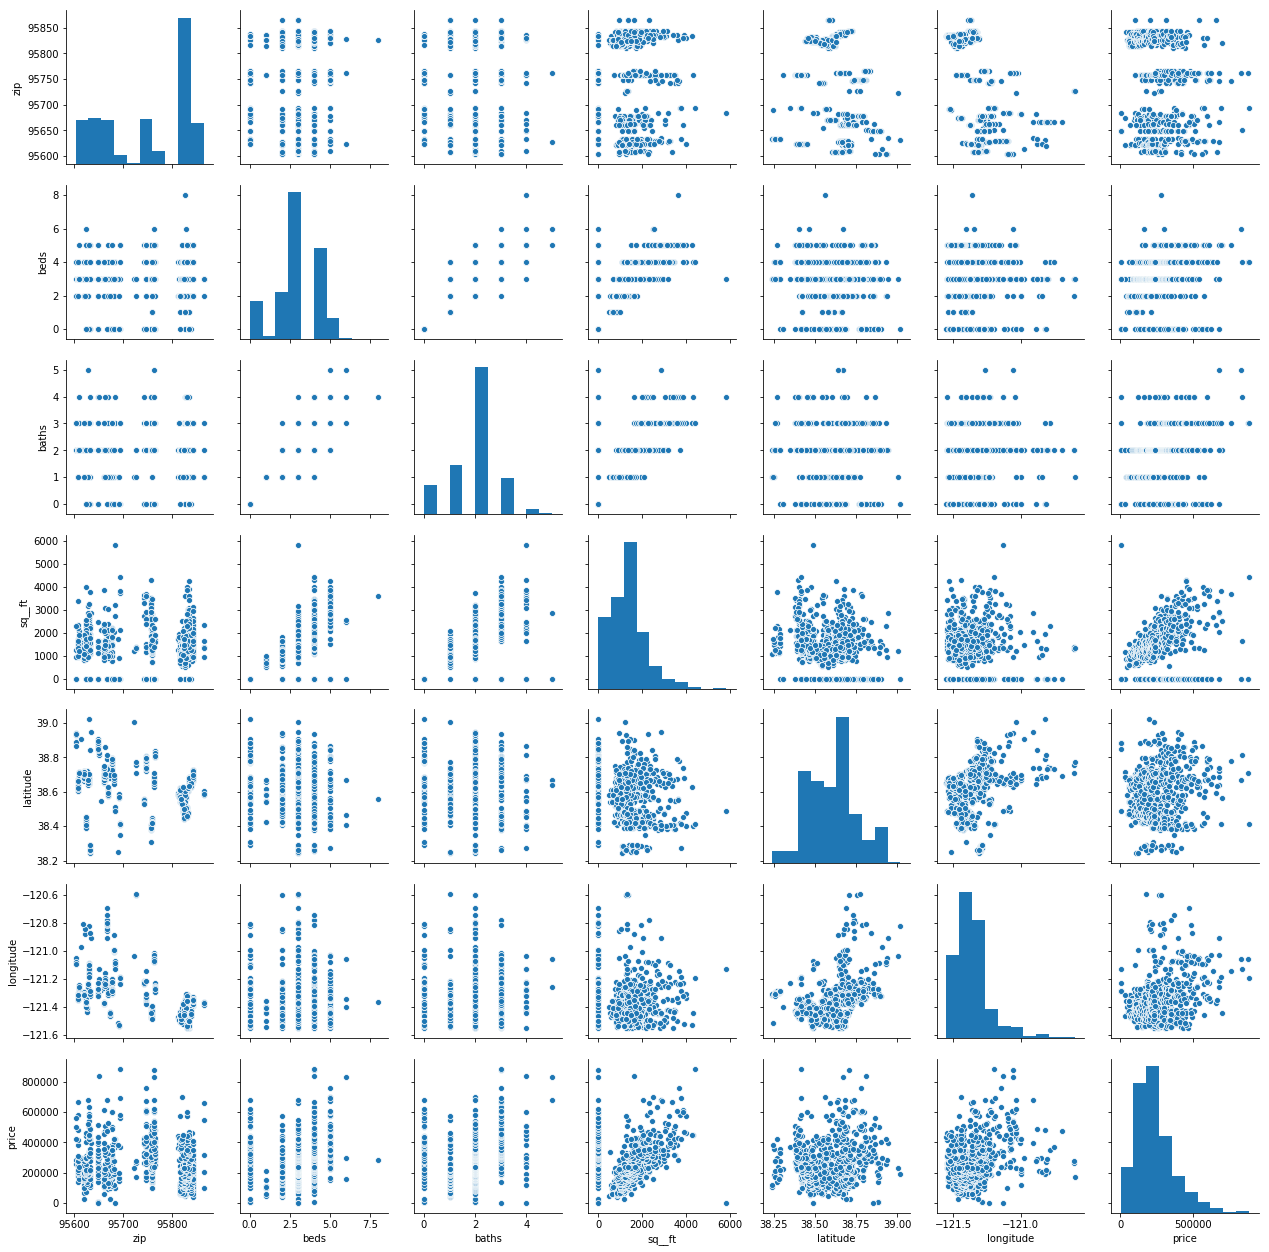

In [15]:
sns.pairplot(house_csv[cols])
plt.show()

__ANSWER:__ The best predictor appears to be `sq__ft` as a scatterplot of `sq__ft` vs. `price` shows a positve correlation: price increases when sq__ft increases.

#### 2.3 Find Coefficient and Intercept using Linear Regression

Using LinearRegression of sklearn.linear_model package find Coefficient and Intercept.

Create an instance of LinearRegression.

Explore following methods:

- fit
- predict
- score

In [16]:
from sklearn.linear_model import LinearRegression

##### 2.3.1 Fit predictor and target variables using linear regression 

In [25]:
# ANSWER

X = house_csv['sq__ft'].values.reshape(-1,1)
y = house_csv['price']

# Instantiate Linear Regression
linreg = LinearRegression()

# Fit model
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

##### 2.3.2 Find R Score

Find $R^2$ Using ```score``` method of Linear Regression.

In [26]:
# ANSWER

linreg.score(X, y)

0.11148717682951437

### 3. Splitting Data

In [23]:
from sklearn.model_selection import train_test_split

#### 3.1 Create training and testing subsets

Hint: Using `train_test_split` Library.

```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
```

In [27]:
# ANSWER
## Create training and testing subsets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#### 3.2 Check Shape, Sample of Test Train Data

In [28]:
# ANSWER
## Check training/test data

print("Training X shape: ", X_train.shape)
print("Training y shape: ", y_train.shape)
print("\n")
print("Test X shape: ", X_test.shape)
print("Test y shape: ", y_test.shape)

Training X shape:  (659, 1)
Training y shape:  (659,)


Test X shape:  (326, 1)
Test y shape:  (326,)


#### 3.3 Using Linear Regression Find The Score

1. Fit model using X_train, y_train
2. Find score using x_test, y_test

In [51]:
# ANSWER
linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
# ANSWER

linreg.score(X_test, y_test)

0.13602012247180006

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house using linear regression model.**

In [53]:
# ANSWER

pred = linreg.predict(1204)
print("Predicted price of house is ${}.".format(round(pred[0], 2)))

Predicted price of house is $223594.18.


In [54]:
# Predict with the test set

preds = linreg.predict(X_test)

In [55]:
from sklearn.metrics import mean_squared_error

In [61]:
# Calculate rmse

mse = mean_squared_error(y_test, preds)
print("RMSE: ", mse ** (1/2))

RMSE:  137665.54386542056


In [62]:
# Multivariate

X2 = house_csv[['sq__ft', 'beds', 'baths']].values
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.33, random_state=42)

## Fit regresion model with new training data
linreg = LinearRegression()
linreg.fit(X2_train, y_train)

## Get R2 Score
linreg.score(X2_train, y_train)

0.17680101409198667

In [63]:
# Show coefficients

linreg.coef_

array([ 1.02832696e+01, -8.41541318e+03,  6.79192355e+04])

In [46]:
# make prediction

pred = linreg.predict([[1204, 3, 2]])

print("Predicted price of house is ${}".format(round(pred[0], 2)))

Predicted price of house is $241221.9


In [64]:
# Find rmse

preds2 = linreg.predict(X2_test)

mse = mean_squared_error(y_test, preds2)
print("RMSE: ", mse ** (1/2))

RMSE:  135009.9601198872
